In [10]:
import duckdb
import pandas as pd

# Path to your local DuckDB file
db_path = "analytics.duckdb"

# Connect to DuckDB
con = duckdb.connect(db_path)

# List tables in the database
tables = con.execute("SHOW TABLES").fetchdf()
print("Tables in database:")
print(tables)

# Preview first 5 rows from each table
for table in tables['name']:
    print(f"\nPreview of table: {table}")
    df = con.execute(f"SELECT * FROM {table} LIMIT 5").fetchdf()
    display(df)

Tables in database:
                         name
0   gold_notif_impact_per_day
1  gold_user_activity_per_day

Preview of table: gold_notif_impact_per_day


,user_id,content_notif,notif_date,is_success,time_spend_after_success



Preview of table: gold_user_activity_per_day


,user_id,date,total_nbr_connexion,total_spend_time,total_message_send_this_day,total_money_spend
0,001fd039-7272-4e18-a324-26122f82c8fc,2025-02-17,1.0,0 days 02:45:36.788000,0.0,0.0
1,001fd039-7272-4e18-a324-26122f82c8fc,2025-02-21,3.0,0 days 12:02:45.509000,0.0,0.0
2,001fd039-7272-4e18-a324-26122f82c8fc,2025-02-24,1.0,0 days 02:26:37.430000,0.0,0.0
3,001fd039-7272-4e18-a324-26122f82c8fc,2025-02-26,1.0,0 days 01:50:47.416000,0.0,0.0
4,001fd039-7272-4e18-a324-26122f82c8fc,2025-02-28,1.0,0 days 01:28:20.312000,0.0,0.0


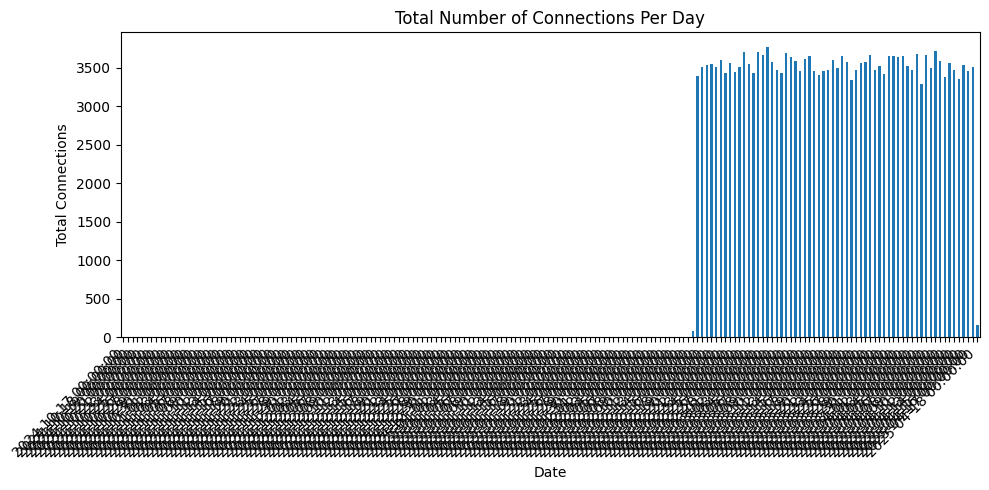

KeyError: 'Column not found: total_spend_time_hours'

<Figure size 1000x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Load tables into DataFrames
notif_df = con.execute("SELECT * FROM gold_notif_impact_per_day").fetchdf()
activity_df = con.execute("SELECT * FROM gold_user_activity_per_day").fetchdf()

# Convert date columns to datetime
activity_df['date'] = pd.to_datetime(activity_df['date'])

# Example 1: Plot total number of connections per day
plt.figure(figsize=(10,5))
activity_df.groupby('date')['total_nbr_connexion'].sum().plot(kind='bar')
plt.title('Total Number of Connections Per Day')
plt.xlabel('Date')
plt.ylabel('Total Connections')
plt.tight_layout()
plt.show()

# Example 2: Plot total spend time per day (convert to hours)
activity_df['total_spend_time_hours'] = pd.to_timedelta(activity_df['total_spend_time']).dt.total_seconds() / 3600
plt.figure(figsize=(10,5))
activity_df.groupby('date')['total_spend_time_hours'].sum().plot(kind='bar', color='orange')
plt.title('Total Spend Time Per Day (hours)')
plt.xlabel('Date')
plt.ylabel('Total Hours')
plt.tight_layout()
plt.show()

# Example 3: Plot total money spent per day
plt.figure(figsize=(10,5))
activity_df.groupby('date')['total_money_spend'].sum().plot(kind='bar', color='green')
plt.title('Total Money Spent Per Day')
plt.xlabel('Date')
plt.ylabel('Total Money Spent')
plt.tight_layout()
plt.show()